<a href="https://colab.research.google.com/github/btian/deep-learning/blob/main/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

!pip install mitdeeplearning
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 2.1MB 5.6MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-cp36-none-any.whl size=2115443 sha256=04eabe714598e7d364046714574a794783418ff300f56f82c42831044b9359f0
  Stored in directory: /root/.cache/pip/wheels/af/dc/2a/5c3633135e7e4ef4fd31463cfa1942cb1bae7486ab94e7a2ad
Successfully built mitdeeplearning


In [2]:
sport = tf.constant('Tennis', tf.string)
number = tf.constant(1.4142, tf.float64)

print(f'`sport` is a {tf.rank(sport).numpy()}-d Tensor')
print(f'`number` is a {tf.rank(number).numpy()}-d Tensor')

`sport` is a 0-d Tensor
`number` is a 0-d Tensor


In [3]:
sports = tf.constant(["Tennis", "Basketball"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

print("`sports` is a {}-d Tensor with shape: {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("`numbers` is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))

`sports` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d Tensor with shape: [3]


In [4]:
matrix = tf.constant([[1.1, 1.2, 1.3],
          [2.1, 2.2, 2.3],
          [3.1, 3.2, 3.3]], tf.float64)
assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2

In [7]:
images = tf.zeros([10, 256, 256, 3], tf.int32)

assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"

In [8]:
row_vector = matrix[1]
column_vector = matrix[:,2]
scalar = matrix[1, 2]

print("`row_vector`: {}".format(row_vector.numpy()))
print("`column_vector`: {}".format(column_vector.numpy()))
print("`scalar`: {}".format(scalar.numpy()))


`row_vector`: [2.1 2.2 2.3]
`column_vector`: [1.3 2.3 3.3]
`scalar`: 2.3


In [9]:
# Create the nodes in the graph, and initialize values
a = tf.constant(15)
b = tf.constant(61)

# Add them!
c1 = tf.add(a,b)
c2 = a + b # TensorFlow overrides the "+" operation so that it is able to act on Tensors
print(c1)
print(c2)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


In [22]:
def func(a, b):
  c = tf.add(a, b)
  d = tf.subtract(b, 1)
  e = tf.multiply(c, d)
  return e

In [23]:
a, b = 1.5, 2.5
e_out = func(a, b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


In [12]:
class OurDenseLayer(tf.keras.layers.Layer):

  def __init__(self, n_output_nodes):
    super().__init__(self)
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    self.W = self.add_weight('weight', shape=[d, self.n_output_nodes])
    self.b = self.add_weight('bias', shape=[1, self.n_output_nodes])

  def call(self, x):
    z = tf.matmul(x, self.W) + self.b
    y = tf.sigmoid(z)
    return y
  
tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y)

[[0.26978594 0.45750415 0.66536945]]
[PASS] test_custom_dense_layer_output


True

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

n_output_nodes = 3
model = Sequential()

dense_layer = Dense(n_output_nodes, activation='sigmoid')
model.add(dense_layer)

In [26]:
x_input = tf.constant([[1,2.]], shape=(1,2))

model_output = model(x_input).numpy()
print(model_output)

[[0.25838017 0.49705413 0.44982037]]


In [27]:
from tensorflow.keras import Model

class SubclassModel(tf.keras.Model):

  def __init__(self, n_output_nodes):
    super().__init__(self)
    self.dense_layer = Dense(n_output_nodes, activation='sigmoid')

  def call(self, inputs):
    return self.dense_layer(inputs)

In [29]:
n_output_nodes = 3
model = SubclassModel(n_output_nodes)

x_input = tf.constant([[1, 2.]], shape=(1,2))

print(model.call(x_input))

tf.Tensor([[0.26104417 0.79073775 0.11169073]], shape=(1, 3), dtype=float32)


In [17]:
class IdentityModel(tf.keras.Model):

  def __init__(self, n_output_nodes):
    super().__init__(self)
    self.dense_layer = tf.keras.layers.Dense(n_output_nodes, activation='sigmoid')

  def call(self, inputs, isidentity=False):
    x = self.dense_layer(inputs)
    if isidentity:
      return inputs
    else:
      return x

In [30]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))
out_activate = model.call(x_input)
out_identity = model.call(x_input, isidentity=True)

print("Network output with activation: {}; network identity output: {}".format(out_activate.numpy(), out_identity.numpy()))

Network output with activation: [[0.33609697 0.8295239  0.73255074]]; network identity output: [[1. 2.]]


In [19]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x * x

dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0

Initializing x=<bound method BaseResourceVariable.numpy of <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[-0.00839665]], dtype=float32)>>


Text(0, 0.5, 'x value')

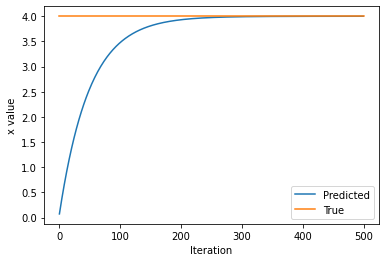

In [21]:
x = tf.Variable([tf.random.normal([1])])
print(f'Initializing x={x.numpy}')

lr = 1e-2
history = []
x_f = 4

for i in range(500):
  with tf.GradientTape() as tape:
    loss = (x - x_f) ** 2

  grad = tape.gradient(loss, x)
  new_x = x - lr * grad
  x.assign(new_x)
  history.append(x.numpy()[0])

plt.plot(history)
plt.plot([0, 500], [x_f, x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')